In [3]:
import pandas as pd
import numpy as np

print("="*80)
print("BENEFICIARY DATASET ANALYSIS")
print("="*80)

df_bene = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
print(f"\nShape: {df_bene.shape}")
print(f"\nColumns ({len(df_bene.columns)}): {list(df_bene.columns)}")
print(f"\nData types:\n{df_bene.dtypes}")
print(f"\nMissing values:")
missing_bene = df_bene.isnull().sum()
missing_bene = missing_bene[missing_bene > 0]
if len(missing_bene) > 0:
    print(missing_bene)
else:
    print("No missing values detected by pandas")

# Check for special missing value indicators
print(f"\nSpecial values check:")
print(f"  County == 0: {(df_bene['County'] == 0).sum()}")
print(f"  State == 0: {(df_bene['State'] == 0).sum()}")
print(f"  Gender == 0: {(df_bene['Gender'] == 0).sum()}")
print(f"  DOD is not null: {df_bene['DOD'].notna().sum()}")

# Check chronic conditions
chronic_cols = [col for col in df_bene.columns if 'Chronic' in col or 'Renal' in col]
print(f"\nChronic condition columns unique values:")
for col in chronic_cols:
    unique_vals = df_bene[col].unique()
    print(f"  {col}: {unique_vals}")

print("\n" + "="*80)
print("OUTPATIENT DATASET ANALYSIS")
print("="*80)

df_out = pd.read_csv("Train_Outpatientdata-1542865627584.csv")
print(f"\nShape: {df_out.shape}")
print(f"\nColumns ({len(df_out.columns)}): {list(df_out.columns)}")
print(f"\nData types:\n{df_out.dtypes}")
print(f"\nMissing values:")
missing_out = df_out.isnull().sum()
missing_out_filtered = missing_out[missing_out > 0]
if len(missing_out_filtered) > 0:
    for col, count in missing_out_filtered.items():
        pct = (count / len(df_out)) * 100
        print(f"  {col}: {count} ({pct:.2f}%)")
else:
    print("No missing values")

# Check for empty strings
print(f"\nEmpty string checks:")
str_cols = df_out.select_dtypes(include=['object']).columns
for col in str_cols:
    empty_count = (df_out[col] == '').sum()
    if empty_count > 0:
        print(f"  {col}: {empty_count} empty strings")

# Check DeductibleAmtPaid
print(f"\nDeductibleAmtPaid unique values: {df_out['DeductibleAmtPaid'].unique()}")

# Check for duplicates
print(f"\nDuplicate ClaimIDs: {df_out['ClaimID'].duplicated().sum()}")
print(f"\nDuplicate rows (all columns): {df_out.duplicated().sum()}")

# Check the specific row mentioned in cleaning
specific_row = df_out[(df_out['BeneID'] == 'BENE15441') & (df_out['ClaimID'] == 'CLM587079')]
print(f"\nSpecific row (BENE15441, CLM587079) exists: {len(specific_row) > 0}")
if len(specific_row) > 0:
    print(f"Details:\n{specific_row}")

print("\n" + "="*80)

BENEFICIARY DATASET ANALYSIS

Shape: (138556, 25)

Columns (25): ['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

Data types:
BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMon

In [4]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('Train_Inpatientdata-1542865627584.csv')

print('=== BASIC INFO ===')
print(f'Shape: {df.shape}')
print(f'Total rows: {len(df)}')
print(f'Total columns: {len(df.columns)}')

print('\n=== COLUMNS ===')
print(df.columns.tolist())

print('\n=== DATA TYPES ===')
print(df.dtypes)

print('\n=== NULL COUNTS ===')
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

print('\n=== UNIQUE VALUE COUNTS ===')
for col in df.columns:
    print(f'{col}: {df[col].nunique()} unique values')

print('\n=== SAMPLE VALUES FOR PHYSICIAN COLUMNS ===')
print('AttendingPhysician sample (first 20 non-null):')
print(df['AttendingPhysician'].dropna().head(20).tolist())

print('\nOperatingPhysician sample (first 20 non-null):')
print(df['OperatingPhysician'].dropna().head(20).tolist())

print('\nOtherPhysician sample (first 20 non-null):')
print(df['OtherPhysician'].dropna().head(20).tolist())

print('\n=== SAMPLE VALUES FOR DIAGNOSIS CODES ===')
print('ClmAdmitDiagnosisCode sample (first 30):')
print(df['ClmAdmitDiagnosisCode'].head(30).tolist())

print('\nClmDiagnosisCode_1 sample (first 20):')
print(df['ClmDiagnosisCode_1'].head(20).tolist())

print('\n=== SAMPLE VALUES FOR PROCEDURE CODES ===')
print('ClmProcedureCode_1 sample (first 20 non-null):')
print(df['ClmProcedureCode_1'].dropna().head(20).tolist())

print('\n=== DEDUCTIBLE AMOUNT ===')
print(f'DeductibleAmtPaid nulls: {df["DeductibleAmtPaid"].isnull().sum()}')
print(f'DeductibleAmtPaid stats:')
print(df['DeductibleAmtPaid'].describe())

print('\n=== FIRST 15 ROWS (ALL COLUMNS) ===')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(df.head(15))

print('\n=== CHECKING FOR DUPLICATES ===')
print(f'Duplicate rows (all columns): {df.duplicated().sum()}')
print(f'Duplicate ClaimIDs: {df["ClaimID"].duplicated().sum()}')

print('\n=== CHECKING FOR EMPTY STRINGS ===')
for col in df.select_dtypes(include='object').columns:
    empty_count = (df[col] == '').sum()
    if empty_count > 0:
        print(f'{col}: {empty_count} empty strings')


=== BASIC INFO ===
Shape: (40474, 30)
Total rows: 40474
Total columns: 30

=== COLUMNS ===
['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']

=== DATA TYPES ===
BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician

In [5]:
import pandas as pd
import numpy as np

# ============================
# 1. LOAD DATA
# ============================
df = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")

print(f"Original shape: {df.shape}")

# ============================
# 2. FIX COUNTY MISSING VALUES
# ============================

# Flag missing county (County == 0 means missing)
df["county_missing"] = (df["County"] == 0).astype(int)

# ============================
# 3. FLAG DEAD OR NOT (DOD)
# ============================

# Some values might be NaN or "0"
df["is_dead"] = df["DOD"].notna().astype(int)

# ============================
# 4. FIX BIRTH YEAR AND CREATE AGE
# ============================

# Convert DOB to datetime
df["DOB"] = pd.to_datetime(df["DOB"], errors="coerce")

# Calculate age (based on 2016 CMS dataset year)
df["Age"] = 2016 - df["DOB"].dt.year

# Clip unreasonable values
df["Age"] = df["Age"].clip(lower=0, upper=110)

# ============================
# 5. CLEAN GENDER FIELD
# ============================

# Known valid values = 1 (Male), 2 (Female)
df["Gender"] = df["Gender"].replace({0: np.nan})
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

# ============================
# 6. CLEAN STATE AND COUNTY
# ============================

df["State"] = df["State"].replace({0: np.nan})
df["County"] = df["County"].replace({0: np.nan})

# ============================
# 7. CHRONIC CONDITIONS → Convert to binary 0/1
# ============================

# FIXED: Data uses 1=Yes, 2=No encoding (not "Y"/NaN)
# We convert to standard binary: 1=Has condition, 0=No condition

chronic_cols_numeric = [
    "ChronicCond_Alzheimer", "ChronicCond_Heartfailure",
    "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary",
    "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart",
    "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis",
    "ChronicCond_stroke"
]

# Convert numeric chronic conditions: 1 → 1 (Yes), 2 → 0 (No)
for col in chronic_cols_numeric:
    df[col] = df[col].replace({1: 1, 2: 0})
    df[col] = df[col].astype(int)

# FIXED: RenalDiseaseIndicator uses "Y"/"0" encoding
df["RenalDiseaseIndicator"] = df["RenalDiseaseIndicator"].replace({"Y": 1, "0": 0})
df["RenalDiseaseIndicator"] = df["RenalDiseaseIndicator"].astype(int)

# ============================
# 8. VALIDATE COVERAGE MONTHS
# ============================

# Ensure coverage months are in valid range (0-12)
df["NoOfMonths_PartACov"] = df["NoOfMonths_PartACov"].clip(lower=0, upper=12)
df["NoOfMonths_PartBCov"] = df["NoOfMonths_PartBCov"].clip(lower=0, upper=12)

# ============================
# 9. REORDER COLUMNS (Optional)
# ============================

cols_front = ["BeneID", "DOB", "DOD", "Age", "Gender", "Race", "State", "County",
              "county_missing", "is_dead"]

other_cols = [c for c in df.columns if c not in cols_front]

df = df[cols_front + other_cols]

# ============================
# 10. SAVE CLEAN VERSION
# ============================

df.to_csv("Train_Beneficiarydata_CLEAN.csv", index=False)

print(f"✔ Beneficiary dataset cleaned successfully!")
print(f"Final shape: {df.shape}")
print(f"\nSample chronic condition values (should be 0/1):")
print(df[["RenalDiseaseIndicator", "ChronicCond_Alzheimer", "ChronicCond_Diabetes"]].head())

Original shape: (138556, 25)
✔ Beneficiary dataset cleaned successfully!
Final shape: (138556, 28)

Sample chronic condition values (should be 0/1):
   RenalDiseaseIndicator  ChronicCond_Alzheimer  ChronicCond_Diabetes
0                      0                      1                     1
1                      0                      0                     0
2                      0                      1                     0
3                      0                      1                     1
4                      0                      0                     1


In [6]:
import pandas as pd
import numpy as np

# ============================
# 1. LOAD INPATIENT DATA
# ============================
df_inpatient = pd.read_csv("Train_Inpatientdata-1542865627584.csv")

print(f"Original shape: {df_inpatient.shape}")

# ============================
# 2. DROP ClmProcedureCode_6 (100% NULL)
# ============================
# ClmProcedureCode_6 has no values (100% null), so we drop it
df_inpatient = df_inpatient.drop(columns=['ClmProcedureCode_6'], errors='ignore')

# ============================
# 3. HANDLE MISSING PHYSICIAN VALUES
# ============================
# Replace NaN values with "NA" for physician columns
physician_cols = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']

for col in physician_cols:
    if col in df_inpatient.columns:
        df_inpatient[col] = df_inpatient[col].fillna("NA")
        df_inpatient[col] = df_inpatient[col].replace("", "NA")

# ============================
# 4. HANDLE MISSING DIAGNOSIS CODES
# ============================
# Replace NaN values with "NA" for diagnosis code columns
diagnosis_cols = [f'ClmDiagnosisCode_{i}' for i in range(1, 11)]

for col in diagnosis_cols:
    if col in df_inpatient.columns:
        df_inpatient[col] = df_inpatient[col].fillna("NA")
        df_inpatient[col] = df_inpatient[col].replace("", "NA")

# ============================
# 5. HANDLE ClmAdmitDiagnosisCode
# ============================
# Fill any missing or empty values in ClmAdmitDiagnosisCode with "Missing"
df_inpatient["ClmAdmitDiagnosisCode"] = df_inpatient["ClmAdmitDiagnosisCode"].fillna("Missing")
df_inpatient["ClmAdmitDiagnosisCode"] = df_inpatient["ClmAdmitDiagnosisCode"].replace("", "Missing")

# ============================
# 6. HANDLE MISSING PROCEDURE CODES
# ============================
# For ClmProcedureCode_1 through ClmProcedureCode_5, fill NaN with 0
# These are numeric codes, so 0 indicates "no procedure code"
procedure_cols = [f'ClmProcedureCode_{i}' for i in range(1, 6)]

for col in procedure_cols:
    if col in df_inpatient.columns:
        df_inpatient[col] = df_inpatient[col].fillna(0)
        # Convert to integer type
        df_inpatient[col] = df_inpatient[col].astype(int)

# ============================
# 7. HANDLE DEDUCTIBLE AMOUNT PAID
# ============================
# DeductibleAmtPaid has only one value (1068.0) for non-null entries
# Fill missing values with the standard deductible amount of 1068.0
df_inpatient["DeductibleAmtPaid"] = df_inpatient["DeductibleAmtPaid"].fillna(1068.0)
# Convert to integer since all values are the same
df_inpatient["DeductibleAmtPaid"] = df_inpatient["DeductibleAmtPaid"].astype(int)

# ============================
# 8. CONVERT DATE COLUMNS TO DATETIME
# ============================
# Convert date columns to datetime format for better processing
date_cols = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']

for col in date_cols:
    if col in df_inpatient.columns:
        df_inpatient[col] = pd.to_datetime(df_inpatient[col], errors='coerce')

# ============================
# 9. CREATE DERIVED FEATURES
# ============================
# Calculate claim duration in days
df_inpatient['ClaimDuration'] = (df_inpatient['ClaimEndDt'] - df_inpatient['ClaimStartDt']).dt.days + 1

# Calculate admission duration in days  
df_inpatient['AdmissionDuration'] = (df_inpatient['DischargeDt'] - df_inpatient['AdmissionDt']).dt.days + 1

# Handle any negative durations (data quality issues)
df_inpatient['ClaimDuration'] = df_inpatient['ClaimDuration'].clip(lower=1)
df_inpatient['AdmissionDuration'] = df_inpatient['AdmissionDuration'].clip(lower=1)

# ============================
# 10. VALIDATE DATA QUALITY
# ============================
# Remove any duplicate claim IDs if they exist
df_inpatient = df_inpatient.drop_duplicates(subset=['ClaimID'], keep='first')

# ============================
# 11. SAVE CLEANED DATA
# ============================
df_inpatient.to_csv("Train_Inpatientdata_CLEAN.csv", index=False)

print(f"✔ Inpatient dataset cleaned successfully! Rows: {len(df_inpatient)}")
print(f"Final shape: {df_inpatient.shape}")

Original shape: (40474, 30)
✔ Inpatient dataset cleaned successfully! Rows: 40474
Final shape: (40474, 31)


In [1]:
import pandas as pd

# ============================
# 1. LOAD OUTPATIENT DATA
# ============================
df_outpatient = pd.read_csv("Train_Outpatientdata-1542865627584.csv")

print(f"Original shape: {df_outpatient.shape}")

# ============================
# 2. DROP PROBLEMATIC ROW
# ============================
# Drop row with BeneID = BENE15441 AND ClaimID = CLM587079 (data quality issue)
df_outpatient = df_outpatient[~((df_outpatient["BeneID"] == "BENE15441") &
                                 (df_outpatient["ClaimID"] == "CLM587079"))]

# ============================
# 3. DROP PROCEDURE CODES (99.97-100% NULL)
# ============================
# ClmProcedureCode_1 through ClmProcedureCode_6 are nearly 100% missing
procedure_cols = [f"ClmProcedureCode_{i}" for i in range(1, 7)]
df_outpatient = df_outpatient.drop(columns=procedure_cols, errors='ignore')

# ============================
# 4. HANDLE ClmAdmitDiagnosisCode
# ============================
# Fill blank/NaN values in ClmAdmitDiagnosisCode with "Missing"
df_outpatient["ClmAdmitDiagnosisCode"] = df_outpatient["ClmAdmitDiagnosisCode"].fillna("Missing")
df_outpatient["ClmAdmitDiagnosisCode"] = df_outpatient["ClmAdmitDiagnosisCode"].replace("", "Missing")

# ============================
# 5. HANDLE PHYSICIAN COLUMNS
# ============================
# FIXED: Added AttendingPhysician to handle its 1,396 missing values
# Replace <null> values with "NA" for physician columns
physician_cols = ["AttendingPhysician", "OperatingPhysician", "OtherPhysician"]

for col in physician_cols:
    if col in df_outpatient.columns:
        df_outpatient[col] = df_outpatient[col].fillna("NA")
        df_outpatient[col] = df_outpatient[col].replace("", "NA")

# ============================
# 6. HANDLE DIAGNOSIS CODES
# ============================
# Replace <null> values with "NA" for diagnosis code columns
diagnosis_cols = [f"ClmDiagnosisCode_{i}" for i in range(1, 11)]

for col in diagnosis_cols:
    if col in df_outpatient.columns:
        df_outpatient[col] = df_outpatient[col].fillna("NA")
        df_outpatient[col] = df_outpatient[col].replace("", "NA")

# ============================
# 7. CONVERT DATE COLUMNS TO DATETIME
# ============================
# FIXED: Convert date columns to datetime format for temporal feature creation
date_cols = ['ClaimStartDt', 'ClaimEndDt']

for col in date_cols:
    if col in df_outpatient.columns:
        df_outpatient[col] = pd.to_datetime(df_outpatient[col], errors='coerce')

# ============================
# 8. CREATE DERIVED FEATURES
# ============================
# FIXED: Calculate claim duration in days
df_outpatient['ClaimDuration'] = (df_outpatient['ClaimEndDt'] - df_outpatient['ClaimStartDt']).dt.days + 1

# Handle any negative durations (data quality issues)
df_outpatient['ClaimDuration'] = df_outpatient['ClaimDuration'].clip(lower=1)

# ============================
# 9. VALIDATE DATA QUALITY
# ============================
# FIXED: Remove any duplicate claim IDs if they exist
df_outpatient = df_outpatient.drop_duplicates(subset=['ClaimID'], keep='first')

# ============================
# 10. SAVE CLEANED DATA
# ============================
df_outpatient.to_csv("Train_Outpatientdata_CLEAN.csv", index=False)

print(f"✔ Outpatient dataset cleaned successfully!")
print(f"Final shape: {df_outpatient.shape}")
print(f"\nSample date columns (should be datetime64):")
print(df_outpatient[['ClaimStartDt', 'ClaimEndDt', 'ClaimDuration']].dtypes)
print(f"\nSample rows:")
print(df_outpatient[['ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'ClaimDuration']].head())

Original shape: (517737, 27)
✔ Outpatient dataset cleaned successfully!
Final shape: (517736, 22)

Sample date columns (should be datetime64):
ClaimStartDt     datetime64[ns]
ClaimEndDt       datetime64[ns]
ClaimDuration             int64
dtype: object

Sample rows:
     ClaimID ClaimStartDt ClaimEndDt  ClaimDuration
0  CLM624349   2009-10-11 2009-10-11              1
1  CLM189947   2009-02-12 2009-02-12              1
2  CLM438021   2009-06-27 2009-06-27              1
3  CLM121801   2009-01-06 2009-01-06              1
4  CLM150998   2009-01-22 2009-01-22              1


## Exploratory Data Analysis (EDA)

In this section, we load the **cleaned datasets** and perform:

1. Target distribution of fraudulent vs. non-fraudulent providers
2. Univariate analysis (claim amounts, ages, chronic conditions, provider claim volumes)
3. Bivariate analysis comparing fraudulent vs. legitimate providers
4. Correlation analysis and multicollinearity
5. Temporal and geographic patterns of claims

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# ==========================
# LOAD CLEANED DATASETS
# ==========================
df_bene = pd.read_csv("Train_Beneficiarydata_CLEAN.csv")
df_inp = pd.read_csv("Train_Inpatientdata_CLEAN.csv")
df_out = pd.read_csv("Train_Outpatientdata_CLEAN.csv")
df_labels = pd.read_csv("Train-1542865627584.csv")   # must contain: Provider, PotentialFraud

print("Beneficiary shape:", df_bene.shape)
print("Inpatient shape:", df_inp.shape)
print("Outpatient shape:", df_out.shape)
print("Labels shape:", df_labels.shape)

# ==========================
# MERGE INPATIENT & OUTPATIENT WITH BENEFICIARIES
# ==========================

# Inpatient merged with beneficiary info
claims_inp = df_inp.merge(df_bene, on="BeneID", how="left")

# Outpatient merged with beneficiary info
claims_out = df_out.merge(df_bene, on="BeneID", how="left")

# Combine inpatient + outpatient
claims_all = pd.concat([claims_inp, claims_out], ignore_index=True)

print("\nCombined total claims:", claims_all.shape)

# Convert date columns to datetime
date_cols = ["ClaimStartDt", "ClaimEndDt", "AdmissionDt", "DischargeDt", "DOB", "DOD"]
for col in date_cols:
    if col in claims_all.columns:
        claims_all[col] = pd.to_datetime(claims_all[col], errors="coerce")

claims_all.head()


Beneficiary shape: (138556, 28)
Inpatient shape: (40474, 31)
Outpatient shape: (517736, 22)
Labels shape: (5410, 2)

Combined total claims: (558210, 58)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClaimDuration,AdmissionDuration,DOB,DOD,Age,Gender,Race,State,County,county_missing,is_dead,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,0.0,0.0,0.0,0.0,0.0,7,7.0,1943-01-01,NaT,73,1,1,39,230.0,0,0,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,0.0,0.0,0.0,0.0,3,3.0,1943-01-01,NaT,73,1,1,39,230.0,0,0,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,4,4.0,1943-01-01,NaT,73,1,1,39,230.0,0,0,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,0.0,0.0,0.0,0.0,9,9.0,1914-03-01,NaT,102,2,2,1,360.0,0,0,0,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,0.0,0.0,0.0,0.0,18,18.0,1938-04-01,NaT,78,2,1,45,780.0,0,0,1,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100


   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

Count of providers by fraud label:
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

Percentage of providers by fraud label:
PotentialFraud
No     90.65
Yes     9.35
Name: proportion, dtype: float64


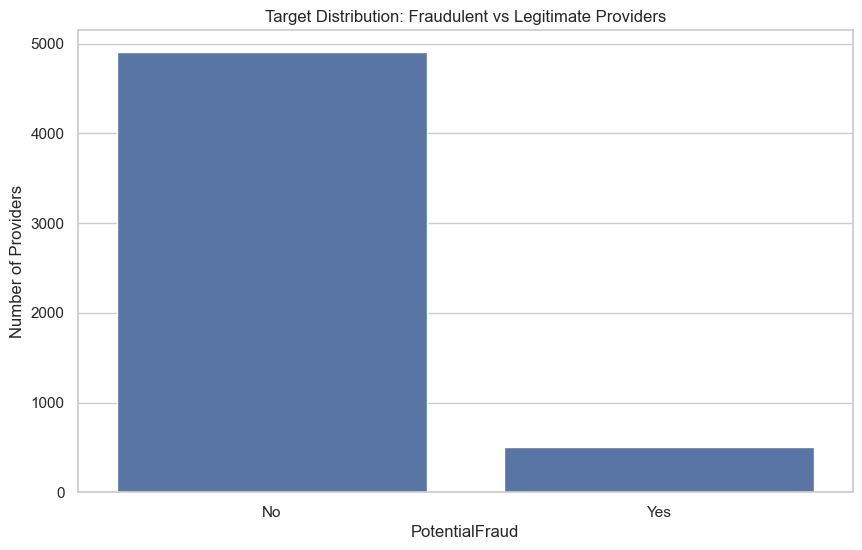

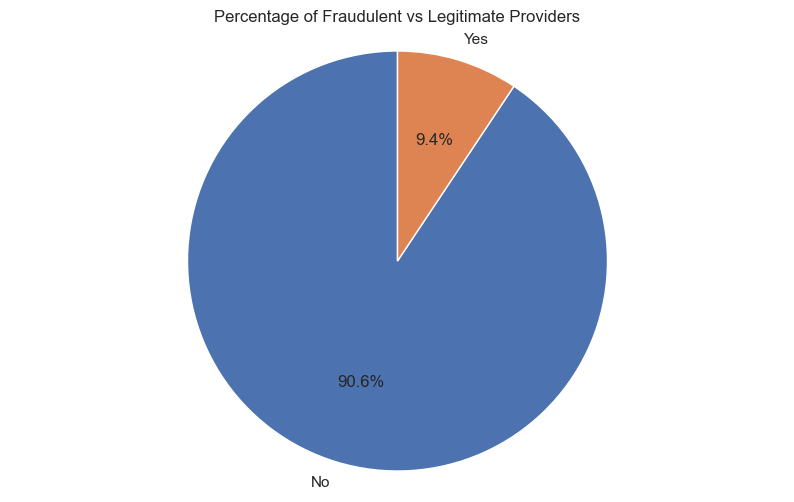

In [10]:
# ==========================
# STEP 1: TARGET DISTRIBUTION
# ==========================

# df_labels already loaded above
print(df_labels.head())

# Basic stats
target_counts = df_labels["PotentialFraud"].value_counts()
target_percent = df_labels["PotentialFraud"].value_counts(normalize=True) * 100

print("\nCount of providers by fraud label:")
print(target_counts)
print("\nPercentage of providers by fraud label:")
print(target_percent.round(2))

# Bar plot of class imbalance
plt.figure()
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Target Distribution: Fraudulent vs Legitimate Providers")
plt.xlabel("PotentialFraud")
plt.ylabel("Number of Providers")
plt.show()

# Pie chart (optional)
plt.figure()
plt.pie(target_counts.values, labels=target_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Percentage of Fraudulent vs Legitimate Providers")
plt.axis("equal")
plt.show()


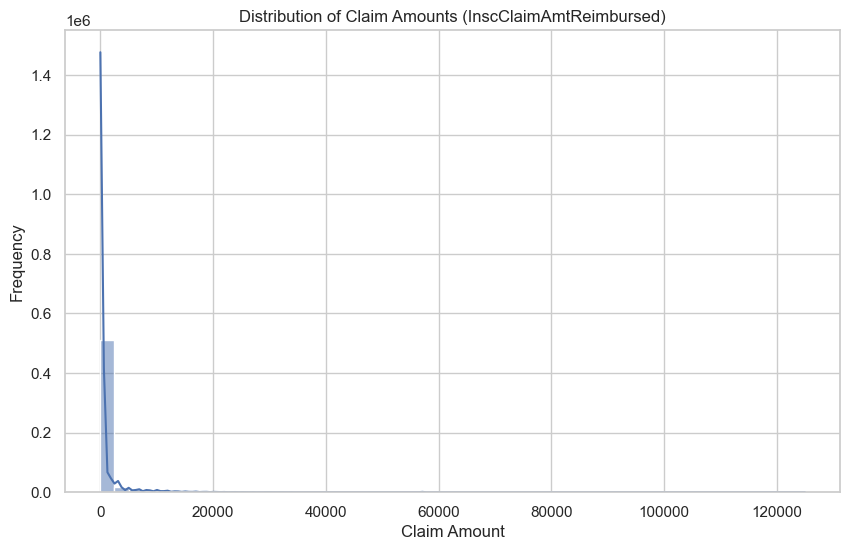

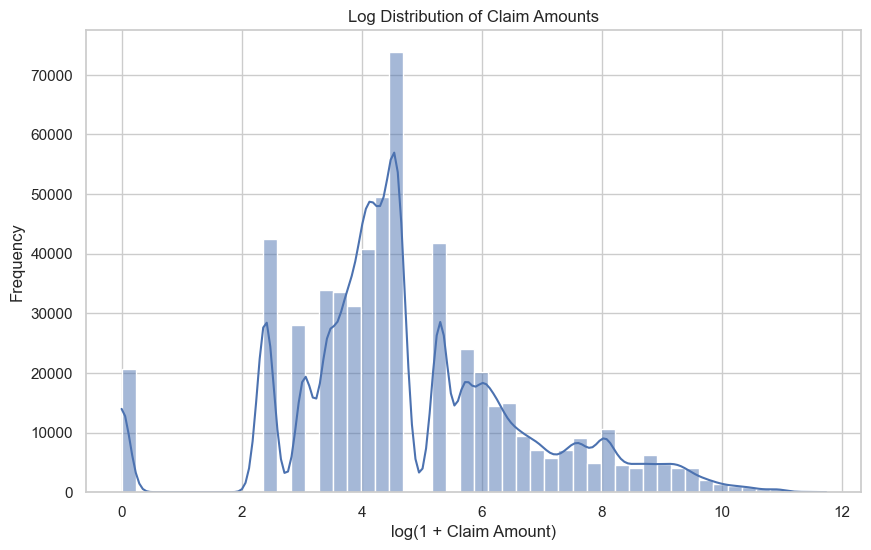

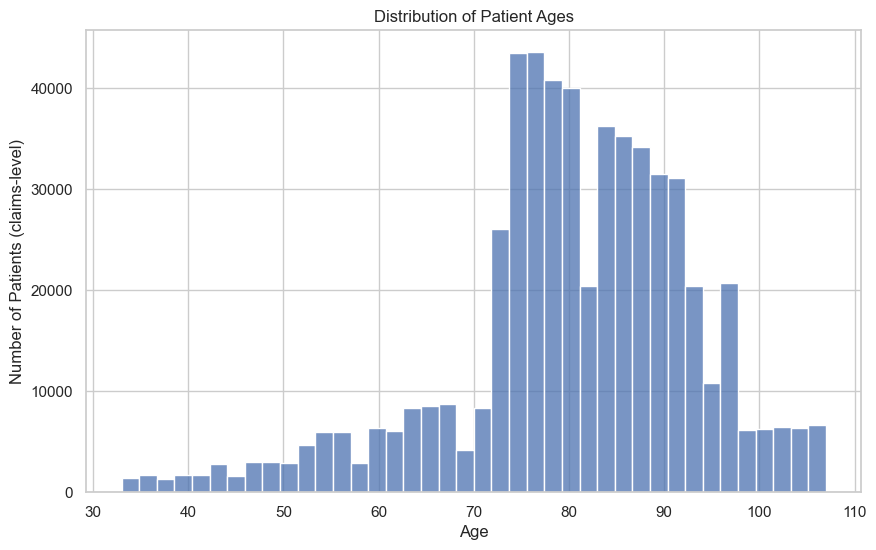

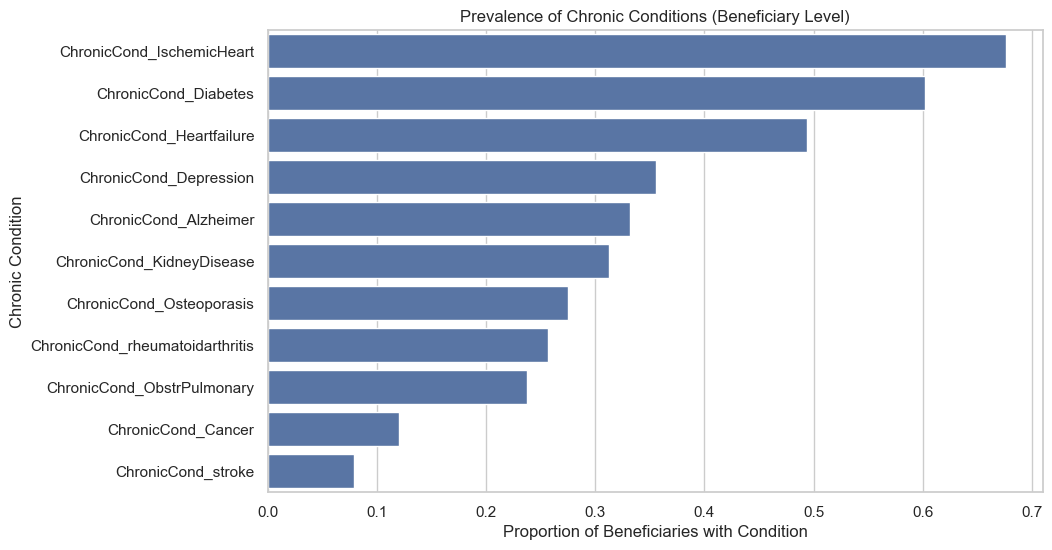

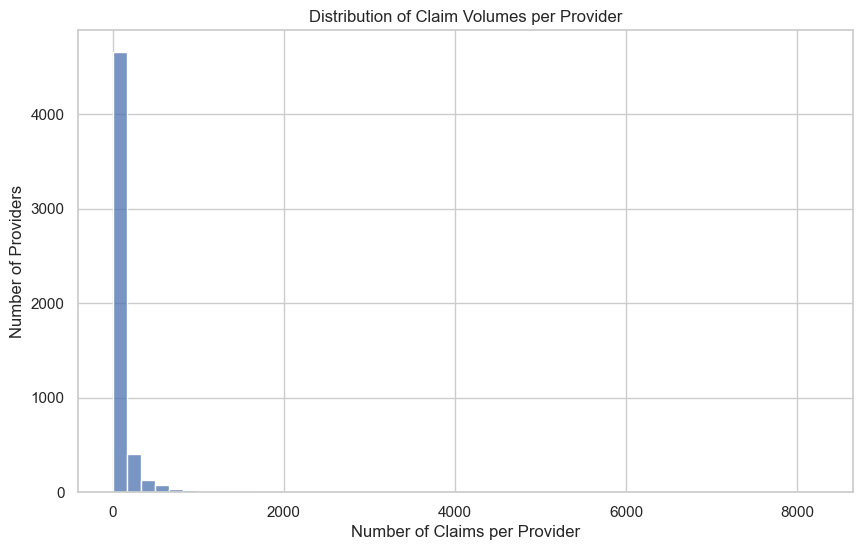


Provider claim volume summary:
count    5410.000000
mean      103.181146
std       272.455490
min         1.000000
25%        10.000000
50%        31.000000
75%        87.000000
max      8240.000000
Name: ClaimID, dtype: float64


In [11]:
# ==========================
# STEP 2: UNIVARIATE ANALYSIS
# ==========================

# 2.1 Distribution of claim amounts
if "InscClaimAmtReimbursed" in claims_all.columns:
    plt.figure()
    sns.histplot(claims_all["InscClaimAmtReimbursed"], bins=50, kde=True)
    plt.title("Distribution of Claim Amounts (InscClaimAmtReimbursed)")
    plt.xlabel("Claim Amount")
    plt.ylabel("Frequency")
    plt.show()

    # Optional: log-scale (to reduce skew)
    plt.figure()
    sns.histplot(np.log1p(claims_all["InscClaimAmtReimbursed"]), bins=50, kde=True)
    plt.title("Log Distribution of Claim Amounts")
    plt.xlabel("log(1 + Claim Amount)")
    plt.ylabel("Frequency")
    plt.show()

# 2.2 Distribution of patient ages
if "Age" in claims_all.columns:
    plt.figure()
    sns.histplot(claims_all["Age"], bins=40, kde=False)
    plt.title("Distribution of Patient Ages")
    plt.xlabel("Age")
    plt.ylabel("Number of Patients (claims-level)")
    plt.show()

# 2.3 Chronic conditions prevalence (from beneficiary table)
chronic_cols = [col for col in df_bene.columns if col.startswith("ChronicCond_")]

if chronic_cols:
    chronic_means = df_bene[chronic_cols].mean().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=chronic_means.values, y=chronic_means.index)
    plt.title("Prevalence of Chronic Conditions (Beneficiary Level)")
    plt.xlabel("Proportion of Beneficiaries with Condition")
    plt.ylabel("Chronic Condition")
    plt.show()

# 2.4 Provider claim volumes (how many claims per provider)
if "Provider" in claims_all.columns and "ClaimID" in claims_all.columns:
    provider_claim_counts = claims_all.groupby("Provider")["ClaimID"].nunique()

    plt.figure()
    sns.histplot(provider_claim_counts, bins=50, kde=False)
    plt.title("Distribution of Claim Volumes per Provider")
    plt.xlabel("Number of Claims per Provider")
    plt.ylabel("Number of Providers")
    plt.show()

    print("\nProvider claim volume summary:")
    print(provider_claim_counts.describe())


In [12]:
# ==========================
# STEP 3: BIVARIATE ANALYSIS
# ==========================

# Merge combined claims with labels via Provider
claims_labeled = claims_all.merge(df_labels, on="Provider", how="left")

# 3.0 Provider-level aggregation
chronic_cols = [col for col in claims_labeled.columns if col.startswith("ChronicCond_")]

# Flags for physician involvement per claim
for col in ["AttendingPhysician", "OperatingPhysician", "OtherPhysician"]:
    if col in claims_labeled.columns:
        claims_labeled[col + "_present"] = claims_labeled[col].notna().astype(int)

agg_dict = {
    "ClaimID": "nunique",
}

if "InscClaimAmtReimbursed" in claims_labeled.columns:
    agg_dict["InscClaimAmtReimbursed"] = ["mean", "sum"]

if "Age" in claims_labeled.columns:
    agg_dict["Age"] = "mean"

for col in chronic_cols:
    agg_dict[col] = "mean"

for col in ["AttendingPhysician_present", "OperatingPhysician_present", "OtherPhysician_present"]:
    if col in claims_labeled.columns:
        agg_dict[col] = "mean"

provider_agg = claims_labeled.groupby(["Provider", "PotentialFraud"]).agg(agg_dict)

# Flatten MultiIndex columns
provider_agg.columns = [
    "_".join([c for c in col if c]) for col in provider_agg.columns.to_flat_index()
]
provider_agg = provider_agg.reset_index()

provider_agg.head()


,Provider,PotentialFraud,ClaimID_nunique,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_sum,Age_mean,ChronicCond_Alzheimer_mean,ChronicCond_Heartfailure_mean,ChronicCond_KidneyDisease_mean,ChronicCond_Cancer_mean,ChronicCond_ObstrPulmonary_mean,ChronicCond_Depression_mean,ChronicCond_Diabetes_mean,ChronicCond_IschemicHeart_mean,ChronicCond_Osteoporasis_mean,ChronicCond_rheumatoidarthritis_mean,ChronicCond_stroke_mean,AttendingPhysician_present_mean,OperatingPhysician_present_mean,OtherPhysician_present_mean
0,PRV51001,No,25,4185.600000,104640,85.280000,0.600000,0.760000,0.680000,0.200000,0.400000,0.360000,0.840000,0.920000,0.240000,0.320000,0.240000,1.000000,0.200000,0.400000
1,PRV51003,Yes,132,4588.409091,605670,76.553030,0.424242,0.606061,0.484848,0.075758,0.310606,0.409091,0.757576,0.848485,0.250000,0.287879,0.090909,1.000000,0.340909,0.189394
2,PRV51004,No,149,350.134228,52170,78.812081,0.429530,0.590604,0.335570,0.107383,0.275168,0.422819,0.704698,0.724832,0.328859,0.308725,0.114094,1.000000,0.181208,0.422819
3,PRV51005,Yes,1165,241.124464,280910,77.000858,0.365665,0.583691,0.435193,0.141631,0.253219,0.416309,0.685837,0.768240,0.295279,0.284120,0.106438,0.998283,0.190558,0.410300
4,PRV51007,No,72,468.194444,33710,75.791667,0.361111,0.555556,0.305556,0.166667,0.222222,0.402778,0.680556,0.708333,0.291667,0.305556,0.166667,1.000000,0.166667,0.361111


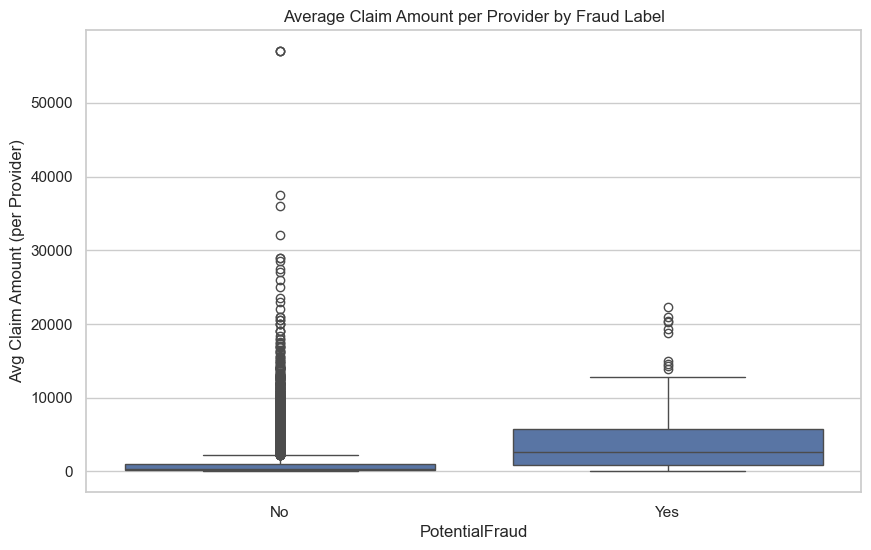

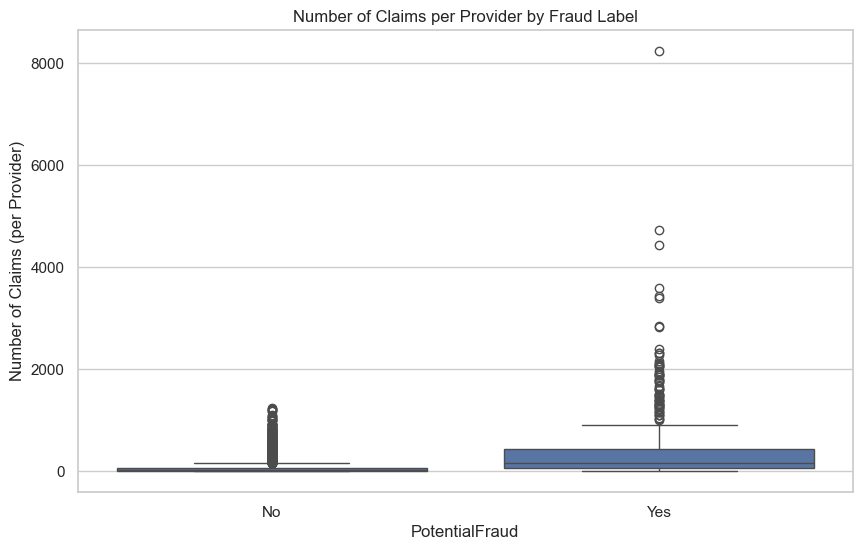

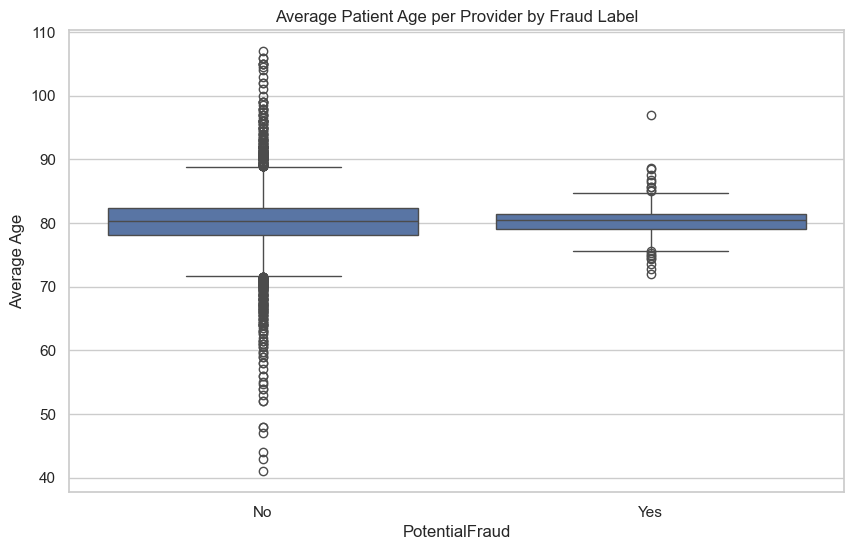

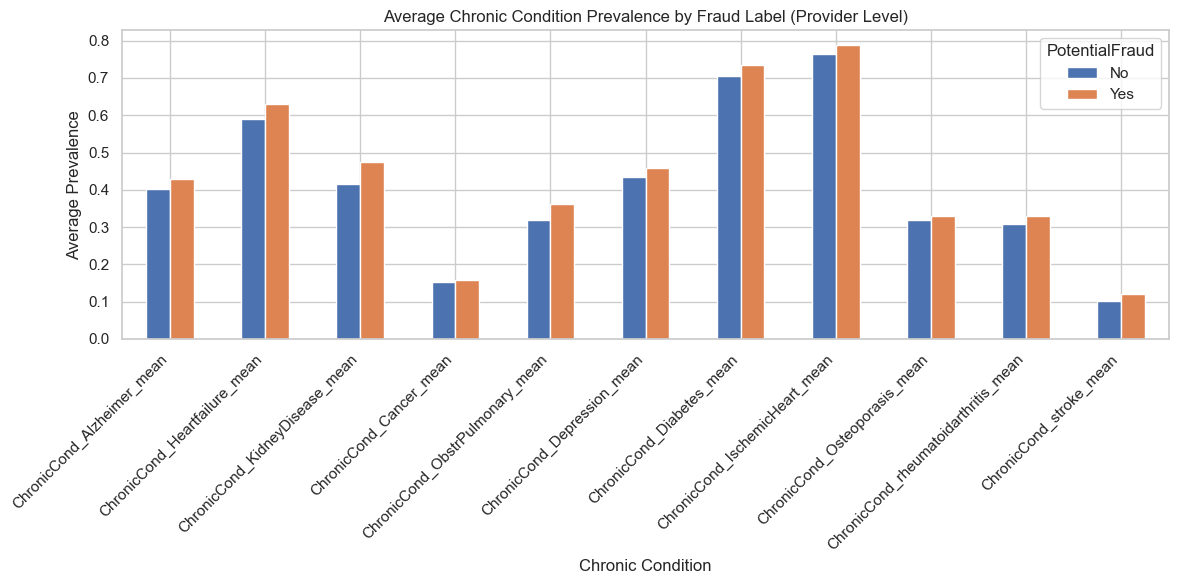

In [13]:
# 3.1 Average claim amounts: Fraud vs Legit
if "InscClaimAmtReimbursed_mean" in provider_agg.columns:
    plt.figure()
    sns.boxplot(
        data=provider_agg,
        x="PotentialFraud",
        y="InscClaimAmtReimbursed_mean"
    )
    plt.title("Average Claim Amount per Provider by Fraud Label")
    plt.xlabel("PotentialFraud")
    plt.ylabel("Avg Claim Amount (per Provider)")
    plt.show()

# 3.2 Number of claims per provider
if "ClaimID_nunique" in provider_agg.columns:
    plt.figure()
    sns.boxplot(
        data=provider_agg,
        x="PotentialFraud",
        y="ClaimID_nunique"
    )
    plt.title("Number of Claims per Provider by Fraud Label")
    plt.xlabel("PotentialFraud")
    plt.ylabel("Number of Claims (per Provider)")
    plt.show()

# 3.3 Patient demographics (age)
if "Age_mean" in provider_agg.columns:
    plt.figure()
    sns.boxplot(
        data=provider_agg,
        x="PotentialFraud",
        y="Age_mean"
    )
    plt.title("Average Patient Age per Provider by Fraud Label")
    plt.xlabel("PotentialFraud")
    plt.ylabel("Average Age")
    plt.show()

# 3.4 Chronic condition prevalence by fraud label
chronic_cols_agg = [col for col in provider_agg.columns if col.startswith("ChronicCond_")]

if chronic_cols_agg:
    chronic_fraud = (
        provider_agg.groupby("PotentialFraud")[chronic_cols_agg]
        .mean()
        .T  # conditions as rows
    )

    chronic_fraud.plot(kind="bar", figsize=(12, 6))
    plt.title("Average Chronic Condition Prevalence by Fraud Label (Provider Level)")
    plt.ylabel("Average Prevalence")
    plt.xlabel("Chronic Condition")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# 3.5 Physician involvement patterns
phys_cols = [col for col in provider_agg.columns if col.endswith("_present")]

if phys_cols:
    phys_fraud = (
        provider_agg.groupby("PotentialFraud")[phys_cols]
        .mean()
        .T
    )

    phys_fraud.plot(kind="bar", figsize=(10, 6))
    plt.title("Physician Involvement Patterns by Fraud Label")
    plt.ylabel("Average Share of Claims with Physician Present")
    plt.xlabel("Physician Type")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


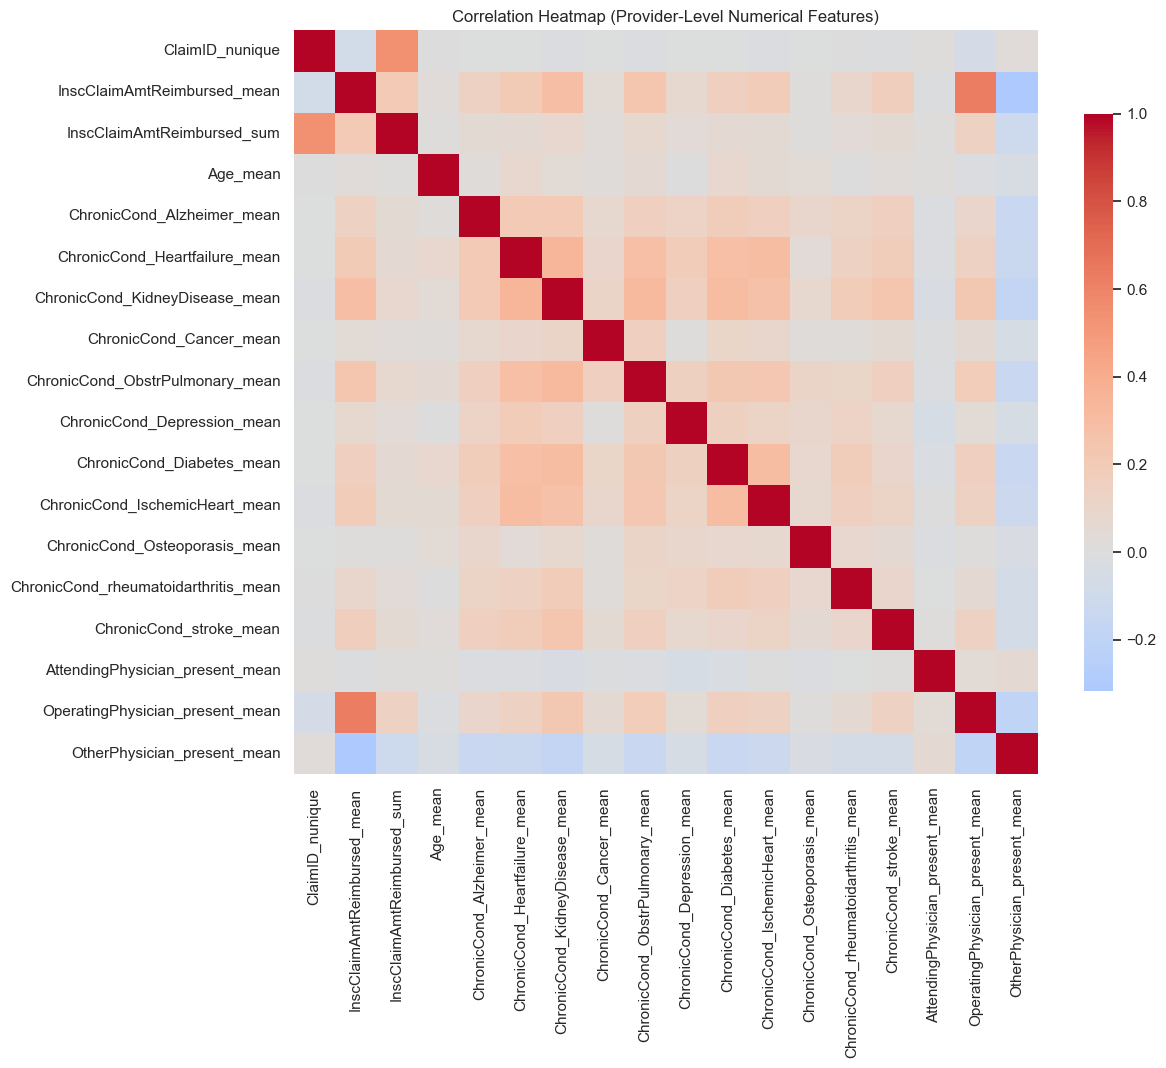


Highly correlated feature pairs (|corr| >= 0.8):


In [14]:
# ==========================
# STEP 4: CORRELATION ANALYSIS
# ==========================

# Use provider-level data for correlation (less rows, more meaningful)
numeric_cols = provider_agg.select_dtypes(include=[np.number]).columns

corr_matrix = provider_agg[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Heatmap (Provider-Level Numerical Features)")
plt.show()

# Identify highly correlated pairs (multicollinearity)
threshold = 0.8
high_corr_pairs = []

for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) >= threshold:
            high_corr_pairs.append(
                (numeric_cols[i], numeric_cols[j], round(corr_val, 3))
            )

print("\nHighly correlated feature pairs (|corr| >= 0.8):")
for a, b, c in high_corr_pairs:
    print(f"{a} – {b}: {c}")


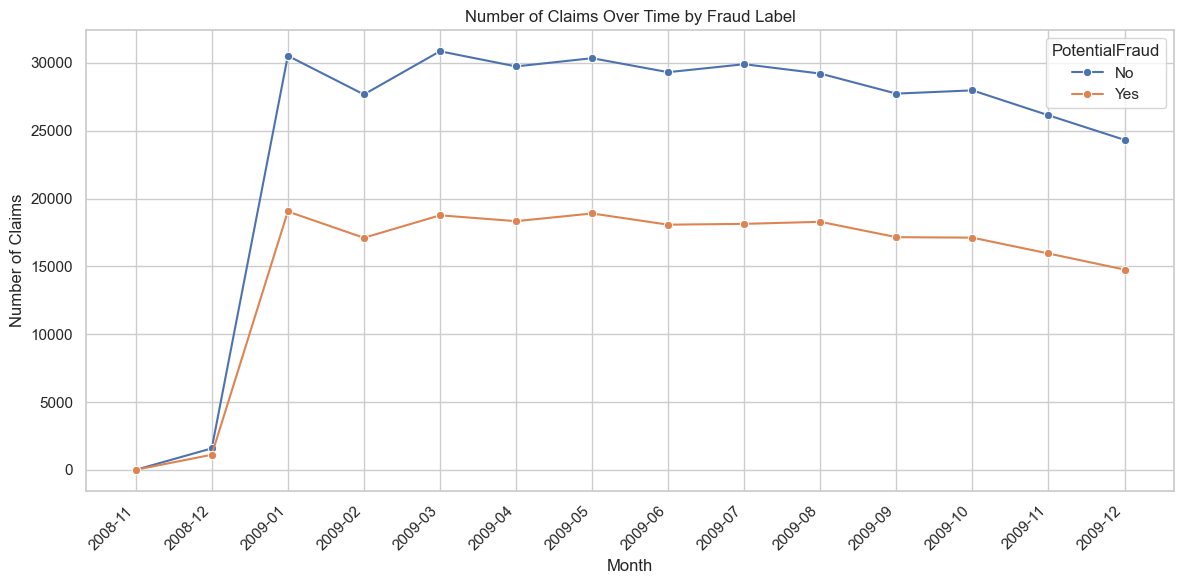

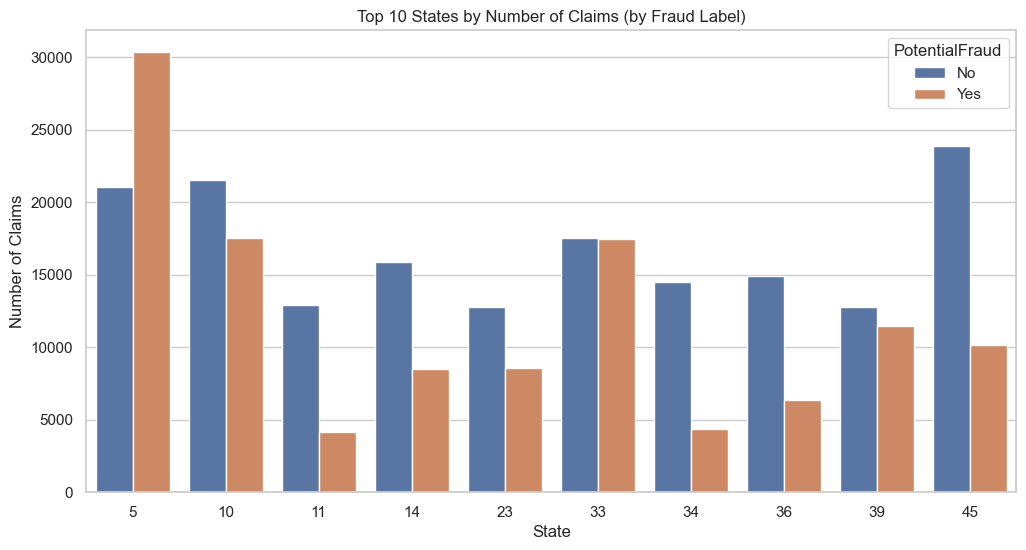

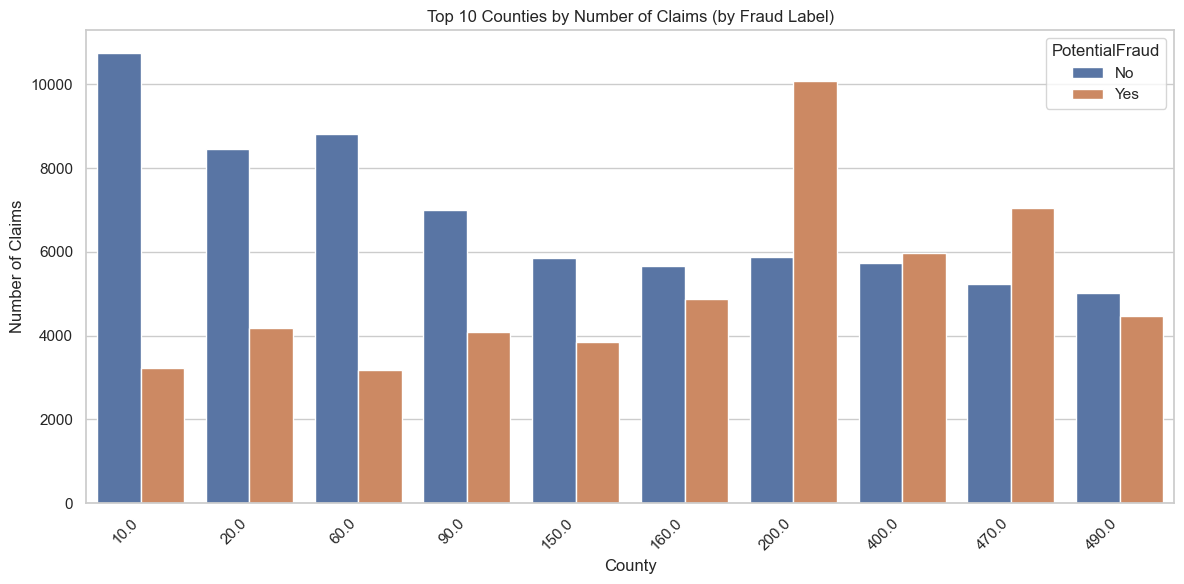

In [15]:
# ==========================
# STEP 5: TEMPORAL & GEOGRAPHIC PATTERNS
# ==========================

# 5.1 Claims over time
if "ClaimStartDt" in claims_labeled.columns:
    claims_labeled["ClaimStartDt"] = pd.to_datetime(
        claims_labeled["ClaimStartDt"], errors="coerce"
    )

    # Group by month
    claims_labeled["ClaimMonth"] = claims_labeled["ClaimStartDt"].dt.to_period("M")

    claims_over_time = (
        claims_labeled.groupby(["ClaimMonth", "PotentialFraud"])["ClaimID"]
        .nunique()
        .reset_index()
    )

    claims_over_time["ClaimMonth"] = claims_over_time["ClaimMonth"].astype(str)

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=claims_over_time,
        x="ClaimMonth",
        y="ClaimID",
        hue="PotentialFraud",
        marker="o"
    )
    plt.title("Number of Claims Over Time by Fraud Label")
    plt.xlabel("Month")
    plt.ylabel("Number of Claims")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# 5.2 Geographic distribution (State, County)

# Geographic distribution by State
if "State" in claims_labeled.columns:
    state_claims = (
        claims_labeled.groupby(["State", "PotentialFraud"])["ClaimID"]
        .nunique()
        .reset_index()
    )

    # Focus on top 10 states by total claims
    top_states = (
        state_claims.groupby("State")["ClaimID"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .index
    )

    state_top = state_claims[state_claims["State"].isin(top_states)]

    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=state_top,
        x="State",
        y="ClaimID",
        hue="PotentialFraud"
    )
    plt.title("Top 10 States by Number of Claims (by Fraud Label)")
    plt.xlabel("State")
    plt.ylabel("Number of Claims")
    plt.show()

# Optional: County-level
if "County" in claims_labeled.columns:
    county_claims = (
        claims_labeled.groupby(["County", "PotentialFraud"])["ClaimID"]
        .nunique()
        .reset_index()
    )

    # Top 10 counties
    top_counties = (
        county_claims.groupby("County")["ClaimID"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .index
    )
    county_top = county_claims[county_claims["County"].isin(top_counties)]

    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=county_top,
        x="County",
        y="ClaimID",
        hue="PotentialFraud"
    )
    plt.title("Top 10 Counties by Number of Claims (by Fraud Label)")
    plt.xlabel("County")
    plt.ylabel("Number of Claims")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


In [7]:
# ============================
# PROVIDER-LEVEL AGGREGATION
# ============================
import pandas as pd
import numpy as np

print("="*60)
print("PROVIDER-LEVEL AGGREGATION")
print("="*60)

# ============================
# 1. LOAD CLEANED DATASETS
# ============================
df_bene = pd.read_csv("Train_Beneficiarydata_CLEAN.csv")
df_inp = pd.read_csv("Train_Inpatientdata_CLEAN.csv")
df_out = pd.read_csv("Train_Outpatientdata_CLEAN.csv")
df_labels = pd.read_csv("Train-1542865627584.csv")

print(f"Beneficiary shape: {df_bene.shape}")
print(f"Inpatient shape: {df_inp.shape}")
print(f"Outpatient shape: {df_out.shape}")
print(f"Labels shape: {df_labels.shape}")

# ============================
# 2. ADD CLAIM TYPE INDICATOR
# ============================
df_inp['ClaimType'] = 'Inpatient'
df_out['ClaimType'] = 'Outpatient'

# ============================
# 3. MERGE CLAIMS WITH BENEFICIARY DATA FIRST
# ============================
print("\nMerging claims with beneficiary data...")

# Merge inpatient claims with beneficiary info
claims_inp = df_inp.merge(df_bene, on='BeneID', how='left')
print(f"  Inpatient after merge: {claims_inp.shape}")

# Merge outpatient claims with beneficiary info
claims_out = df_out.merge(df_bene, on='BeneID', how='left')
print(f"  Outpatient after merge: {claims_out.shape}")

# ============================
# 4. COMBINE ALL CLAIMS
# ============================
claims_all = pd.concat([claims_inp, claims_out], ignore_index=True)

print(f"\nCombined claims: {len(claims_all)}")
print(f"Unique providers: {claims_all['Provider'].nunique()}")
print(f"Unique beneficiaries: {claims_all['BeneID'].nunique()}")

# ============================
# 5. AGGREGATION BY PROVIDER
# ============================
print("\nAggregating to provider level...")

# Define chronic condition columns (from beneficiary data)
chronic_cols = [col for col in claims_all.columns if col.startswith('ChronicCond_')]
if 'RenalDiseaseIndicator' in claims_all.columns:
    chronic_cols.append('RenalDiseaseIndicator')

print(f"  Chronic condition columns found: {len(chronic_cols)}")

# Build aggregation dictionary
agg_dict = {
    # Financial features
    'InscClaimAmtReimbursed': ['sum', 'mean', 'std', 'max', 'min'],
    'DeductibleAmtPaid': ['sum', 'mean'],
    
    # Volume features
    'ClaimID': 'nunique',
    'BeneID': 'nunique',
    
    # Demographic features (from beneficiary data)
    'Age': ['mean', 'std', 'min', 'max'],
    'Gender': lambda x: (x == 1).mean(),  # Male ratio (1=Male, 2=Female)
    'is_dead': 'mean',  # Deceased patient ratio
    
    # Temporal features
    'ClaimDuration': ['mean', 'std', 'max'],
}

# Add AdmissionDuration if it exists (inpatient only)
if 'AdmissionDuration' in claims_all.columns:
    agg_dict['AdmissionDuration'] = ['mean', 'max']

# Add chronic conditions aggregation
for col in chronic_cols:
    if col in claims_all.columns:
        agg_dict[col] = 'mean'

# Add ClaimType ratio
agg_dict['ClaimType'] = lambda x: (x == 'Inpatient').mean()

# Perform aggregation
provider_df = claims_all.groupby('Provider').agg(agg_dict)

# ============================
# 6. FLATTEN COLUMN NAMES
# ============================
new_columns = []
for col in provider_df.columns:
    if isinstance(col, tuple):
        # Handle lambda functions
        if '<lambda>' in str(col[1]):
            if col[0] == 'Gender':
                new_columns.append('MaleRatio')
            elif col[0] == 'ClaimType':
                new_columns.append('InpatientRatio')
            else:
                new_columns.append(f'{col[0]}_custom')
        else:
            new_columns.append(f'{col[0]}_{col[1]}')
    else:
        new_columns.append(col)

provider_df.columns = new_columns
provider_df = provider_df.reset_index()

# ============================
# 7. RENAME COLUMNS FOR CLARITY
# ============================
rename_dict = {
    'InscClaimAmtReimbursed_sum': 'TotalReimbursement',
    'InscClaimAmtReimbursed_mean': 'AvgReimbursement',
    'InscClaimAmtReimbursed_std': 'StdReimbursement',
    'InscClaimAmtReimbursed_max': 'MaxReimbursement',
    'InscClaimAmtReimbursed_min': 'MinReimbursement',
    'DeductibleAmtPaid_sum': 'TotalDeductible',
    'DeductibleAmtPaid_mean': 'AvgDeductible',
    'ClaimID_nunique': 'TotalClaims',
    'BeneID_nunique': 'UniquePatients',
    'Age_mean': 'AvgAge',
    'Age_std': 'StdAge',
    'Age_min': 'MinAge',
    'Age_max': 'MaxAge',
    'is_dead_mean': 'DeceasedRatio',
    'ClaimDuration_mean': 'AvgClaimDuration',
    'ClaimDuration_std': 'StdClaimDuration',
    'ClaimDuration_max': 'MaxClaimDuration',
}

# Add AdmissionDuration renames if they exist
if 'AdmissionDuration_mean' in provider_df.columns:
    rename_dict['AdmissionDuration_mean'] = 'AvgAdmissionDuration'
    rename_dict['AdmissionDuration_max'] = 'MaxAdmissionDuration'

# Rename chronic condition columns
for col in provider_df.columns:
    if col.endswith('_mean') and ('ChronicCond_' in col or 'RenalDisease' in col):
        new_name = col.replace('_mean', '_Prevalence')
        rename_dict[col] = new_name

provider_df = provider_df.rename(columns=rename_dict)

# ============================
# 8. ADD DERIVED FEATURES
# ============================
print("  Adding derived features...")

# Claims per patient
provider_df['ClaimsPerPatient'] = provider_df['TotalClaims'] / provider_df['UniquePatients']

# Reimbursement per patient
provider_df['ReimbursementPerPatient'] = provider_df['TotalReimbursement'] / provider_df['UniquePatients']

# Reimbursement per claim
provider_df['ReimbursementPerClaim'] = provider_df['TotalReimbursement'] / provider_df['TotalClaims']

# Outpatient ratio (complement of InpatientRatio)
if 'InpatientRatio' in provider_df.columns:
    provider_df['OutpatientRatio'] = 1 - provider_df['InpatientRatio']

# ============================
# 9. HANDLE MISSING VALUES
# ============================
print("  Handling missing values...")

# Fill NaN in std columns (providers with single claim have NaN std)
std_cols = [col for col in provider_df.columns if 'Std' in col]
for col in std_cols:
    provider_df[col] = provider_df[col].fillna(0)

# Fill NaN in AdmissionDuration (outpatient-only providers)
if 'AvgAdmissionDuration' in provider_df.columns:
    provider_df['AvgAdmissionDuration'] = provider_df['AvgAdmissionDuration'].fillna(0)
    provider_df['MaxAdmissionDuration'] = provider_df['MaxAdmissionDuration'].fillna(0)

# ============================
# 10. MERGE WITH FRAUD LABELS
# ============================
print("  Merging with fraud labels...")

provider_df = provider_df.merge(df_labels, on='Provider', how='left')
provider_df['PotentialFraud_Binary'] = (provider_df['PotentialFraud'] == 'Yes').astype(int)

# ============================
# 11. SAVE FINAL DATASET
# ============================
output_file = "Provider_Level_Features.csv"
provider_df.to_csv(output_file, index=False)

# ============================
# 12. PRINT SUMMARY
# ============================
print("\n" + "="*60)
print("AGGREGATION COMPLETE!")
print("="*60)

PROVIDER-LEVEL AGGREGATION
Beneficiary shape: (138556, 28)
Inpatient shape: (40474, 31)
Outpatient shape: (517736, 22)
Labels shape: (5410, 2)

Merging claims with beneficiary data...
  Inpatient after merge: (40474, 59)
  Outpatient after merge: (517736, 50)

Combined claims: 558210
Unique providers: 5410
Unique beneficiaries: 138556

Aggregating to provider level...
  Chronic condition columns found: 12
  Adding derived features...
  Handling missing values...
  Merging with fraud labels...

AGGREGATION COMPLETE!
